In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [3]:
torch.set_default_dtype(torch.float)

In [36]:
x = pd.read_csv("Data/x_train.csv", index_col=0).values.reshape(-1, 784)
y = pd.read_csv("Data/y_train.csv", index_col=0).values.argmax(axis=1)
x_test = pd.read_csv("Data/x_test.csv", index_col=0).values.reshape(-1, 784)
y_test = pd.read_csv("Data/y_test.csv", index_col=0).values.argmax(axis=1)

In [37]:
x, y, x_test, y_test = map(torch.Tensor, (x, y, x_test, y_test))

In [38]:
train_ds = TensorDataset(x, y)
eval_ds = TensorDataset(x_test, y_test)
train_dl = DataLoader(train_ds, batch_size=64)
eval_dl = DataLoader(eval_ds, batch_size=64)

In [131]:
mistakes_ds = TensorDataset(mistakes_x, mistakes_y)
mistakes_dl = DataLoader(mistakes_ds, batch_size=32)

In [39]:
w = torch.randn(784, 10, requires_grad=True)
b = torch.randn(10, requires_grad=True)

In [40]:
def model(xb):
    return ((xb @ w) + b)

In [41]:
loss_func = F.cross_entropy

In [142]:
for epoch in range(5):
    for xb, yb in train_dl:
        pred = model(xb)

        loss = loss_func(pred, yb.long())

        loss.backward()
        with torch.no_grad():
            w -= .01 * w.grad
            b -= .01 * b.grad
            w.grad.zero_()
            b.grad.zero_()

tensor(6)


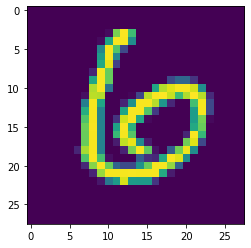

In [143]:
test_num = 11
print(model(x_test[test_num]).argmax())
plt.imshow(x_test[test_num].reshape(28,28))

In [144]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [155]:
accuracy(model(x_test), y_test)

tensor(0.9121)

In [156]:
class torchConvNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, 3, 2, 1)